In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Olivetti faces dataset
from sklearn.datasets import fetch_olivetti_faces
ollivetti = fetch_olivetti_faces()
x=ollivetti.images
X = ollivetti.images[0].astype(float)  # Convert to float for numerical stability
print(X)


[[0.30991736 0.36776859 0.41735536 ... 0.37190083 0.33057851 0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.33884299 0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.33884299 0.29752067]
 ...
 [0.21487603 0.20661157 0.22314049 ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


In [16]:
print("Original x shape:", x.shape)


Original x shape: (400, 64, 64)


In [17]:
def SVD(X):


  # Step 1: Compute the C matrix
  C = np.dot(X.T, X)

  # Step 2: Compute the eigenvalues and eigenvectors of the C matrix
  eigenvalues, eigenvectors = np.linalg.eig(C)

  # Step 3: Sort eigenvalues and corresponding eigenvectors in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  # Step 4: Compute the singular values and singular vectors
  singular_values = np.sqrt(np.real(eigenvalues))
  s_v = np.dot(X, eigenvectors) / singular_values

  # Now, you have U, S, and Vt
  U = s_v
  S = singular_values
  Vt = eigenvectors.T

  return U,S,Vt




**SVD for Single Image**

In [25]:
U,S,Vt=SVD(X)



# Verify the shapes of U, S, and Vt
print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of Vt:", Vt.shape)

Shape of U: (64, 64)
Shape of S: (64,)
Shape of Vt: (64, 64)


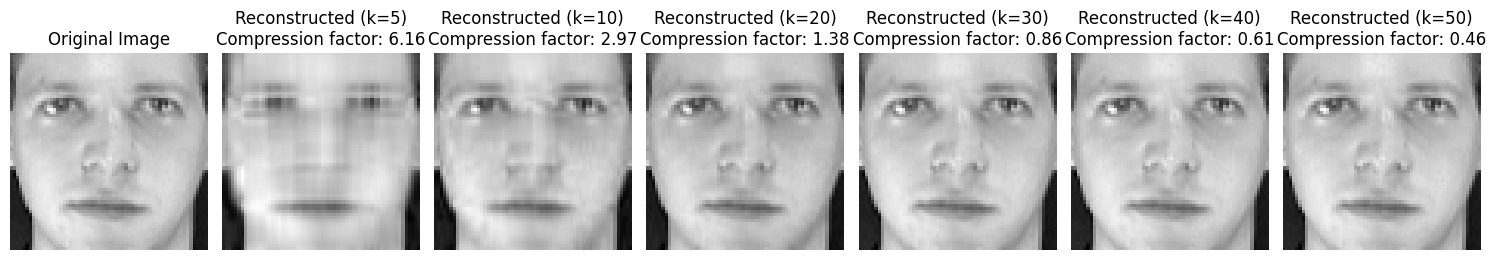

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Number of principal components to consider
num_principal_components_list = [5, 10, 20, 30, 40, 50]
mse_list = []
compression_ratio_list = []

# Create subplots for each number of principal components
fig, axes = plt.subplots(1, len(num_principal_components_list) + 1, figsize=(15, 4))

# Plot the original image
axes[0].imshow(X, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Calculate the total number of elements in the original image
total_elements = X.size

# Iterate over various numbers of principal components
for i, num_components in enumerate(num_principal_components_list):
    # Perform SVD and reconstruct the image
    X_reconstructed = U[:, :num_components] @ np.diag(S[:num_components]) @ Vt[:num_components, :]

    # Calculate mean squared error
    mse = np.mean((X - X_reconstructed) ** 2)
    mse_list.append(mse)

    # Calculate the total number of elements in the reconstructed image
    reconstructed_elements = U[:, :num_components].size + np.diag(S[:num_components]).size + Vt[:num_components, :].size

    # Calculate percentage compression
    compression_ratio = (  total_elements / reconstructed_elements)
    compression_ratio_list.append(compression_ratio)

    # Plot the reconstructed image
    axes[i + 1].imshow(X_reconstructed, cmap='gray')
    axes[i + 1].set_title(f'Reconstructed (k={num_components})\nCompression factor: {compression_ratio:.2f}')
    axes[i + 1].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


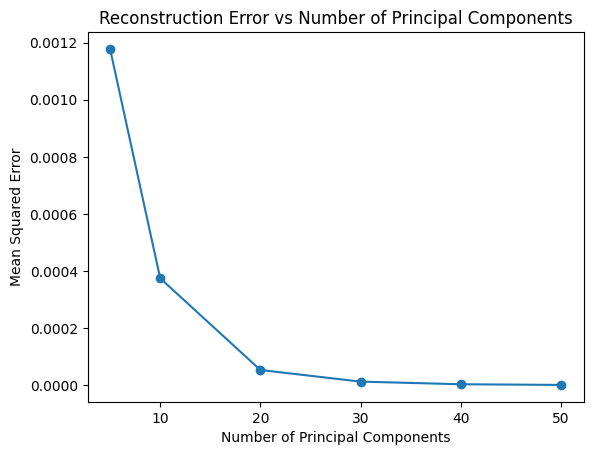

In [20]:
# Plot the error curve
plt.plot(num_principal_components_list, mse_list, marker='o')
plt.title('Reconstruction Error vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.show()

**SVD for Dataset**

In [30]:
X = x.reshape((400, 4096))

In [31]:
U,S,Vt=SVD(X)


# Verify the shapes of U, S, and Vt
print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of Vt:", Vt.shape)

Shape of U: (400, 4096)
Shape of S: (4096,)
Shape of Vt: (4096, 4096)


<ipython-input-17-020bfc5ef2ea>:16: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(np.real(eigenvalues))


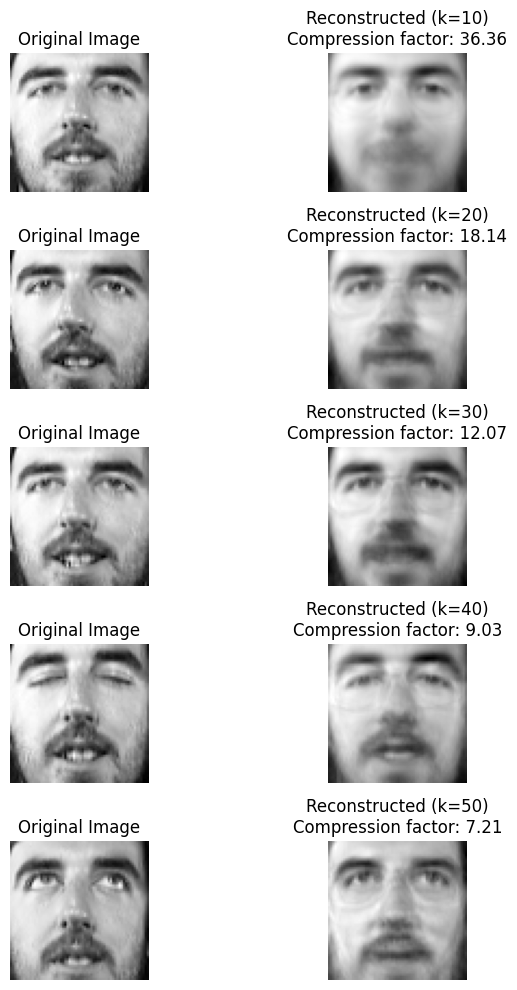

In [36]:
# Number of principal components to consider
num_principal_components_list = [10, 20, 30, 40, 50]
mse_list=[]
compression_ratio_list = []

# Create subplots for each number of principal components
fig, axes = plt.subplots(len(num_principal_components_list), 2, figsize=(8, 2 * len(num_principal_components_list)))


# Calculate the total number of elements in the original image
total_elements = X.size



# Iterate over various numbers of principal components
for i, num_components in enumerate(num_principal_components_list):
    # Perform SVD and reconstruct the images
    u=U[:, :num_components]
    v=Vt[:num_components, :]
    s=np.diag(S[:num_components])

    X_reconstructed = u @ s @ v

    # Calculate mean squared error
    mse = np.mean((X - X_reconstructed) ** 2)
    mse_list.append(mse)

    # Calculate the total number of elements in the reconstructed image
    reconstructed_elements = U[:, :num_components].size + np.diag(S[:num_components]).size + Vt[:num_components, :].size


    # Calculate percentage compression
    compression_ratio = ( total_elements / reconstructed_elements )
    compression_ratio_list.append(compression_ratio)



    # Plot the original image
    axes[i, 0].imshow(x[i+100], cmap='gray')
    axes[i, 0].set_title(f"Original Image")
    axes[i, 0].axis('off')

    # Plot the reconstructed image with percentage error
    axes[i, 1].imshow(X_reconstructed[i+100].reshape(64, 64), cmap='gray')
    axes[i, 1].set_title(f'Reconstructed (k={num_components})\nCompression factor: {compression_ratio:.2f}')
    axes[i, 1].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



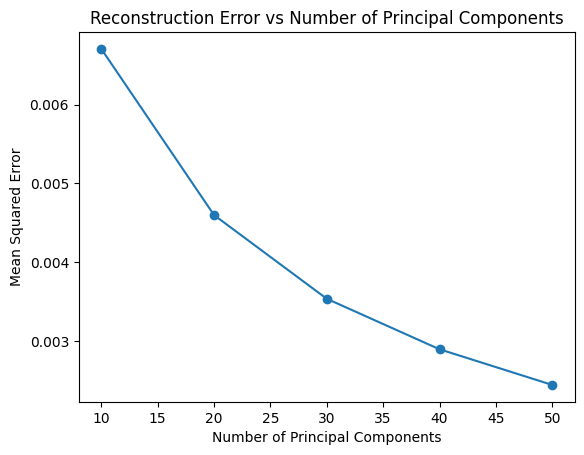

In [14]:
# Plot the error curve
plt.plot(num_principal_components_list, mse_list, marker='o')
plt.title('Reconstruction Error vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.show()